In [ ]:
 #LSTM
 # past 60 day stock price
 import math
 import numpy as np
 import pandas as pd
 from pandas_datareader import data as pdr
 from sklearn.preprocessing import MinMaxScaler
 from keras.models import Sequential
 from keras.layers import Dense, LSTM
 import matplotlib.pyplot as plt
 import yfinance as yfin
 yfin.pdr_override()
 plt.style.use('fivethirtyeight')
 stock = '2330.TW'
 #note: 20 -> 0.9
 #:   25 -> 0.8

In [ ]:
df = pdr.get_data_yahoo(stock, start="2016-01-01", end="2022-03-21")
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-04,142.5,143.5,139.0,139.5,113.656967,39169000
2016-01-05,139.0,140.0,137.0,138.0,112.434830,46381000
2016-01-06,138.0,138.0,135.0,135.5,110.397964,53617000
2016-01-07,134.5,135.0,130.5,133.0,108.361107,62539000
2016-01-08,132.0,135.0,132.0,134.0,109.175865,50123000
...,...,...,...,...,...,...
2022-03-14,574.0,577.0,572.0,572.0,569.181030,33919577
2022-03-15,562.0,563.0,558.0,558.0,555.250000,74092231
2022-03-16,564.0,565.0,555.0,558.0,558.000000,43438327


In [ ]:
df.shape

(1508, 6)

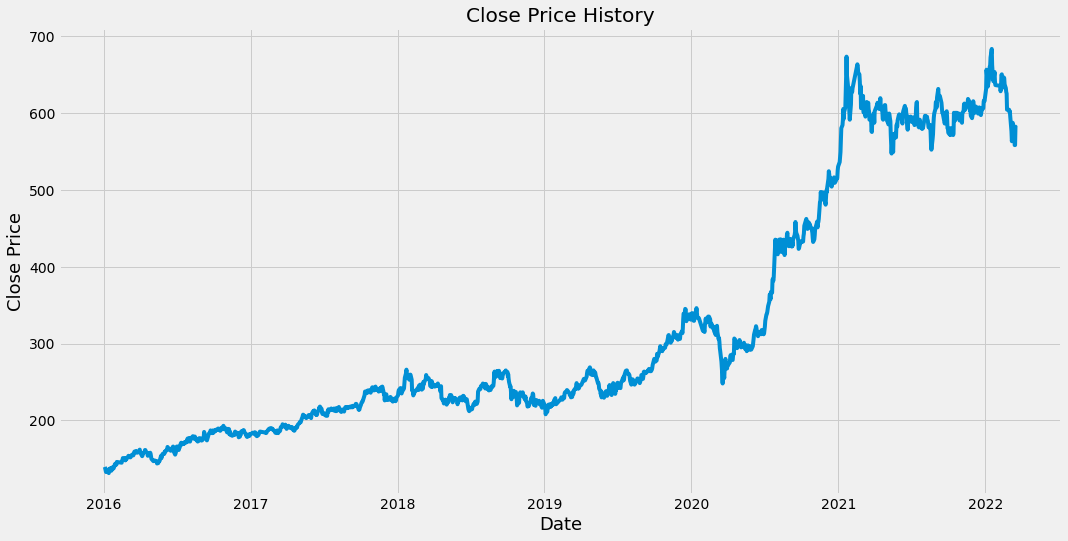

In [ ]:
#visualize the clozing price
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.show()

In [ ]:
data = df.filter(['Close'])
dataset = data.values
training_data_len = math.ceil(len(dataset)*.9) #training set length
training_data_len 

1358

In [ ]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.01450589],
       [0.01178604],
       [0.00725295],
       ...,
       [0.77334542],
       [0.8168631 ],
       [0.81504986]])

In [ ]:
#create the training data set
#create the scaled training data set
train_data = scaled_data[0:training_data_len, :]
x_train = []
y_train = []

#60 is the number of data machine knows when predicting
for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i<=61:
    print(x_train)
    print(y_train)
    print()

[array([0.01450589, 0.01178604, 0.00725295, 0.00271985, 0.00453309,
       0.00271985, 0.00271985, 0.00362647, 0.        , 0.0099728 ,
       0.0099728 , 0.01178604, 0.00543971, 0.00634633, 0.01269266,
       0.01450589, 0.01087942, 0.01450589, 0.01541251, 0.02085222,
       0.02266546, 0.0199456 , 0.02629193, 0.02447869, 0.02901179,
       0.0299184 , 0.03535811, 0.03535811, 0.03535811, 0.03263826,
       0.0299184 , 0.0344515 , 0.03173164, 0.03717135, 0.03898459,
       0.04079782, 0.03807797, 0.03717135, 0.03717135, 0.03898459,
       0.04170444, 0.04261106, 0.0444243 , 0.04170444, 0.0444243 ,
       0.04895739, 0.05077063, 0.05167724, 0.04895739, 0.05077063,
       0.04895739, 0.04805077, 0.04986401, 0.04986401, 0.0543971 ,
       0.05530372, 0.04895739, 0.03989121, 0.04170444, 0.04714415])]
[0.04895738893925658]

[array([0.01450589, 0.01178604, 0.00725295, 0.00271985, 0.00453309,
       0.00271985, 0.00271985, 0.00362647, 0.        , 0.0099728 ,
       0.0099728 , 0.01178604, 0.00

In [ ]:
#convert the x_train and y_train to numpy array
x_train, y_train = np.array(x_train), np.array(y_train)


In [ ]:
#reshape to 3-dimension
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1298, 60, 1)

In [ ]:
#LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(20))
model.add(Dense(1))

In [ ]:
#compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
#train the model
model.fit(x_train, y_train, batch_size=1, epochs=4)

Epoch 1/4
1298/1298 [==============================] - 39s 28ms/step - loss: 0.0016
Epoch 2/4
1298/1298 [==============================] - 37s 28ms/step - loss: 6.7511e-04
Epoch 3/4
1298/1298 [==============================] - 37s 28ms/step - loss: 6.3316e-04
Epoch 4/4
1298/1298 [==============================] - 37s 28ms/step - loss: 6.5391e-04


In [ ]:
#Create the testing data set
#Create a new array containing scaled values from index 1500 to 1950
test_data = scaled_data[training_data_len - 60: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [ ]:
#Convert the data to a numpy array
x_test = np.array(x_test)

In [ ]:
#Reshape to 3-dimension
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
#Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)


In [ ]:
#Get the root mean squared error (RMSE)
#measure how good the prediction is
rmse = np.sqrt(np.mean(predictions-y_test)**2)
rmse

3.4826487415241747

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


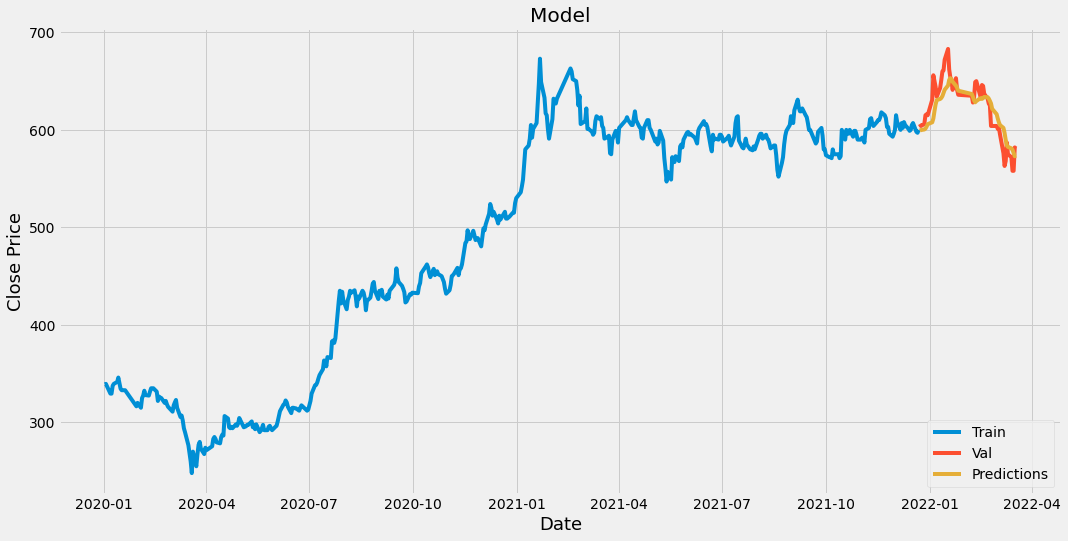

In [ ]:
#plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#visualize
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
#Show the actual and predicted prices
valid

,Close,Predictions
Date,,
2021-12-23,606.0,599.223328
2021-12-24,604.0,599.802917
2021-12-27,606.0,600.403503
2021-12-28,615.0,601.249084
2021-12-29,616.0,603.417297
2021-12-30,615.0,605.828430
2022-01-03,631.0,607.772095
2022-01-04,656.0,611.669678
2022-01-05,650.0,619.412231


In [ ]:
#Get the quote
tsmc_quote = pdr.DataReader(stock, data_source='yahoo', start='2012-01-01', end='2021-06-22')
#Create a snew dataframe
new_df = tsmc_quote.filter(['Close'])
#get the last 60 day
last_60_days = new_df[-60:].values
#Scale the data
last_60_days_scaled = scaler.transform(last_60_days)

X_test = []
#Append the past 60 days
X_test.append(last_60_days_scaled)
#Convert
X_test = np.array(X_test)
#Reshape
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#Get predicted scaled price
pred_price = model.predict(X_test)

pred_price = scaler.inverse_transform(pred_price)
print(pred_price)


[*********************100%***********************]  1 of 1 completed
[[597.9759]]


In [ ]:

#get the answer
startTime = '2022-03-01'
endTime = '2021-03-21'
tsmc_quote2 = pdr.DataReader(stock, data_source='yahoo', start=startTime, end=endTime)
print(tsmc_quote2['Close'])

[*********************100%***********************]  1 of 1 completed

1 Failed download:
- 2330.TW: Invalid input - start date cannot be after end date. startDate = 1646092800, endDate = 1616284800
Series([], Name: Close, dtype: float64)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


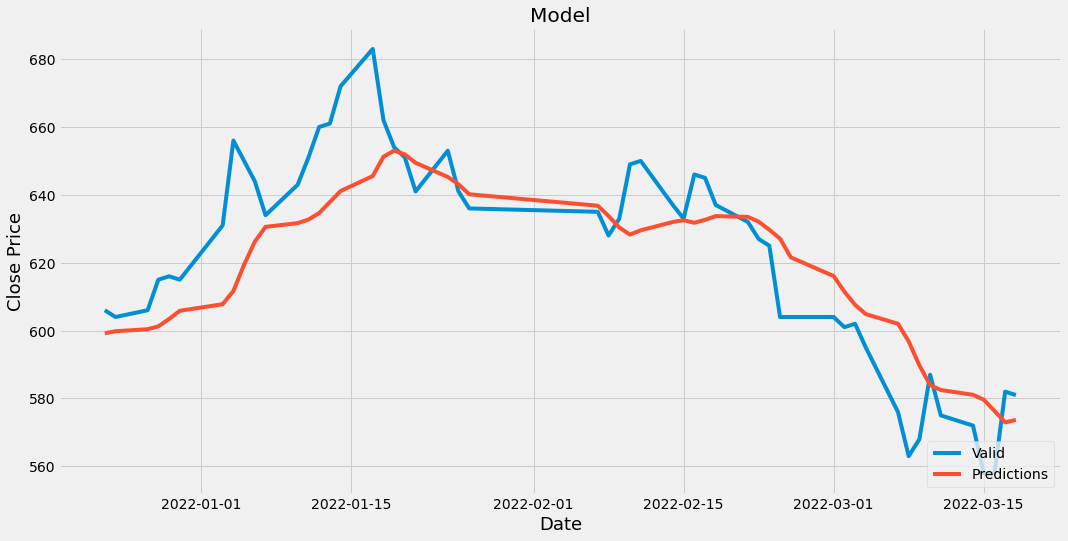

In [ ]:
#plot the data

valid = data[training_data_len:]
valid['Predictions'] = predictions
#visualize
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Valid', 'Predictions'], loc='lower right')
plt.show()